## Import Required Libraries
- **pandas**: Used for handling and analyzing tabular data (dataframes).  
- **numpy**: Provides numerical operations, mainly for arrays.  
- **seaborn**: Statistical visualization library for generating attractive plots.  
- **matplotlib.pyplot**: Used for creating static, animated, and interactive plots.  
- **warnings.filterwarnings('ignore')**: Suppresses unnecessary warnings.  
- **%matplotlib inline**: Ensures that plots appear directly within Jupyter Notebook.  


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Load the data
#file_path = 'D:\My folder\ostad\module_15\TESLA DATA.csv'
df = pd.read_csv('D:\My folder\ostad\module_15\TESLA DATA.csv')
df

<>:11: SyntaxWarning: invalid escape sequence '\M'
<>:11: SyntaxWarning: invalid escape sequence '\M'
C:\Users\43667\AppData\Local\Temp\ipykernel_12896\3543078150.py:11: SyntaxWarning: invalid escape sequence '\M'
  df = pd.read_csv('D:\My folder\ostad\module_15\TESLA DATA.csv')


,date,open,high,low,close,volume
0,6/29/2010,1.2667,1.6667,1.1693,1.5927,281494500
1,6/30/2010,1.7193,2.0279,1.5533,1.5887,257806500
2,7/1/2010,1.6667,1.7280,1.3513,1.4640,123282000
3,7/2/2010,1.5333,1.5400,1.2473,1.2800,77097000
4,7/6/2010,1.3333,1.3333,1.0553,1.0740,103003500
...,...,...,...,...,...,...
3657,1/10/2025,391.4000,399.2800,377.2900,394.7400,62287333
3658,1/13/2025,383.2100,403.7900,380.0700,403.3100,67580494
3659,1/14/2025,414.3400,422.6400,394.5400,396.3600,84565022
3660,1/15/2025,409.9000,429.8000,405.6610,428.2200,81375460


In [2]:
# Check for missing values
df.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
dtype: int64

 **Time series forecasting requires a proper datetime index**                     



In [3]:
# Convert 'Date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Check data types
df.dtypes

date      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
volume             int64
dtype: object

In [4]:
df.head()

,date,open,high,low,close,volume
0,2010-06-29,1.2667,1.6667,1.1693,1.5927,281494500
1,2010-06-30,1.7193,2.0279,1.5533,1.5887,257806500
2,2010-07-01,1.6667,1.7280,1.3513,1.4640,123282000
3,2010-07-02,1.5333,1.5400,1.2473,1.2800,77097000
4,2010-07-06,1.3333,1.3333,1.0553,1.0740,103003500


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3662 entries, 0 to 3661
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    3662 non-null   datetime64[ns]
 1   open    3662 non-null   float64       
 2   high    3662 non-null   float64       
 3   low     3662 non-null   float64       
 4   close   3662 non-null   float64       
 5   volume  3662 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 171.8 KB


- **df.shape** → Displays the number of rows and columns.
- **df.describe()** → Provides summary statistics (mean, min, max, percentiles).
- **df.isnull().sum()** → Checks for missing values in each column.
- **df.duplicated().sum()** → Checks for duplicate rows.

In [6]:
df.shape

(3662, 6)

In [7]:
df.describe()

,date,open,high,low,close,volume
count,3662,3662.000000,3662.000000,3662.000000,3662.000000,3.662000e+03
mean,2017-10-05 15:40:36.045876736,82.414746,84.265215,80.478195,82.401394,9.631821e+07
min,2010-06-29 00:00:00,1.076000,1.108700,0.998700,1.053300,1.777500e+06
25%,2014-02-18 06:00:00,12.178850,12.395800,11.869850,12.131650,4.899463e+07
50%,2017-10-04 12:00:00,17.989350,18.321000,17.726750,17.973000,8.171990e+07
75%,2021-05-25 18:00:00,178.970000,183.590000,175.395000,179.675000,1.215224e+08
max,2025-01-16 00:00:00,475.900000,488.539900,457.510100,479.860000,9.140814e+08
std,NaN,108.831348,111.341759,106.151609,108.773509,7.743734e+07


In [8]:
df.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
dtype: int64

In [9]:
df.duplicated().sum()

0

# Uses Seaborn’s sns.lineplot() to plot Tesla’s closing price over time.
- The x-axis represents time (date).
- The y-axis represents closing stock price.
- The blue line shows how the stock price changes over time.
- Purpose: Helps identify trends and seasonality before applying ARIMA/SARIMA models.

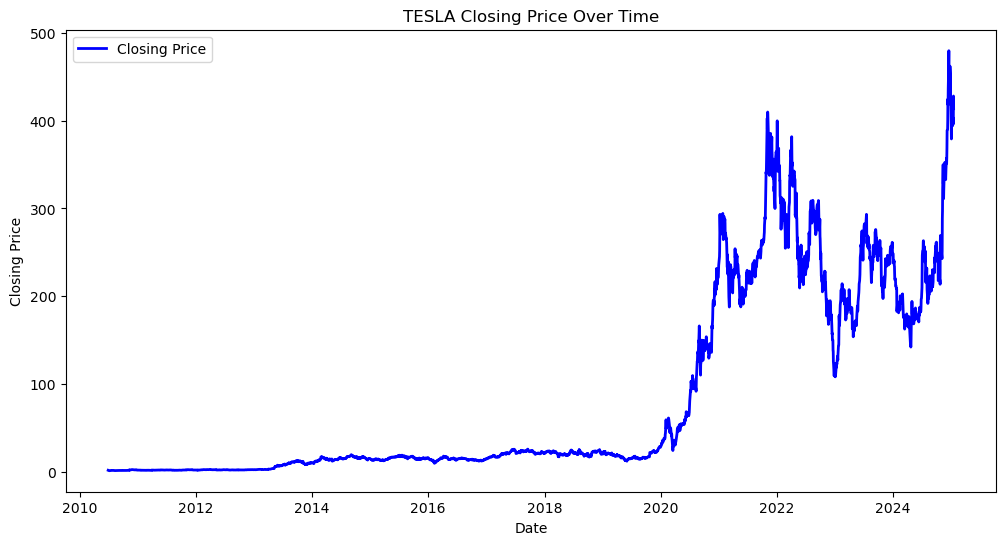

In [10]:
# Plot the closing price over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='date', y='close', label='Closing Price', color='blue', linewidth=2)
plt.title('TESLA Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

# Ensures date column is properly formatted using pd.to_datetime().
- Sorts the data by date to maintain the correct time sequence.
- Calculates the 30-day rolling average of the closing price
- Plots the rolling average to smooth out short-term fluctuations.
- Purpose: Helps visualize trends more clearly by reducing noise.



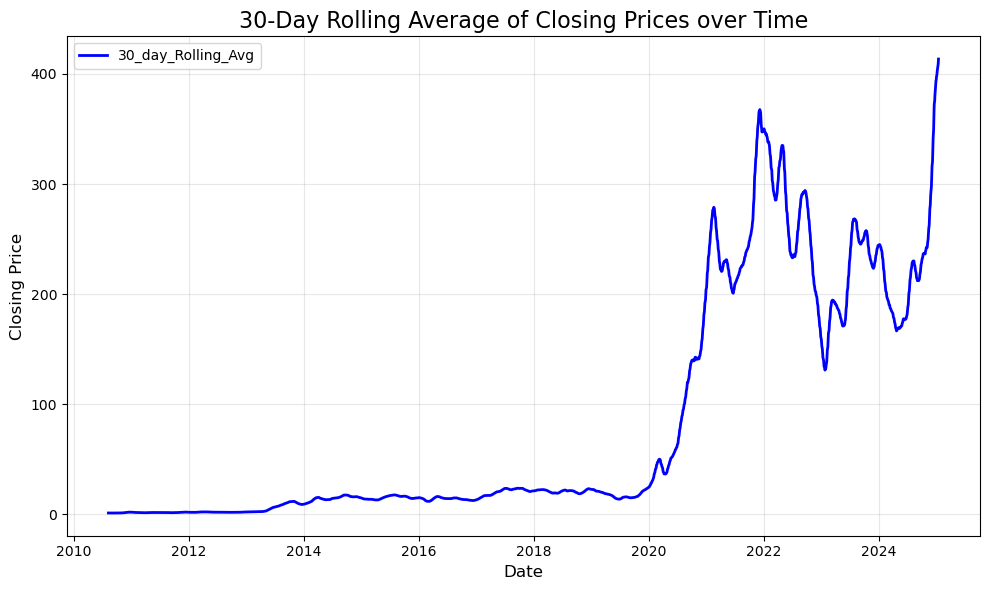

In [11]:
# Ensure the date column is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Step 1: Sort data by date (important for rolling operations)
df = df.sort_values(by='date')

# Step 2: Calculate the 30-day rolling average for the closing price
df['30_day_rolling_avg'] = df['close'].rolling(window=30).mean()

# Step 3: Plot the 30-day rolling average (x: closing price, y: date)
plt.figure(figsize=(10, 6))
sns.lineplot(data=df,  x='date', y='30_day_rolling_avg', label= '30_day_Rolling_Avg', color='blue', linewidth=2)

# Step 4: Add title, labels, and grid
plt.title('30-Day Rolling Average of Closing Prices over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)

plt.grid(alpha=0.3)  # Add grid for readability
plt.tight_layout()  # Adjust layout to prevent overlapping

# Step 5: Show the plot
plt.show()

# Calculates percentage change in Tesla’s closing price:
- pct_change() computes the relative change between consecutive days.
- Multiplying by 100 converts it to a percentage.
- Plots the percentage change over time.
- Purpose: Helps detect volatility (e.g., stock crashes or surges).



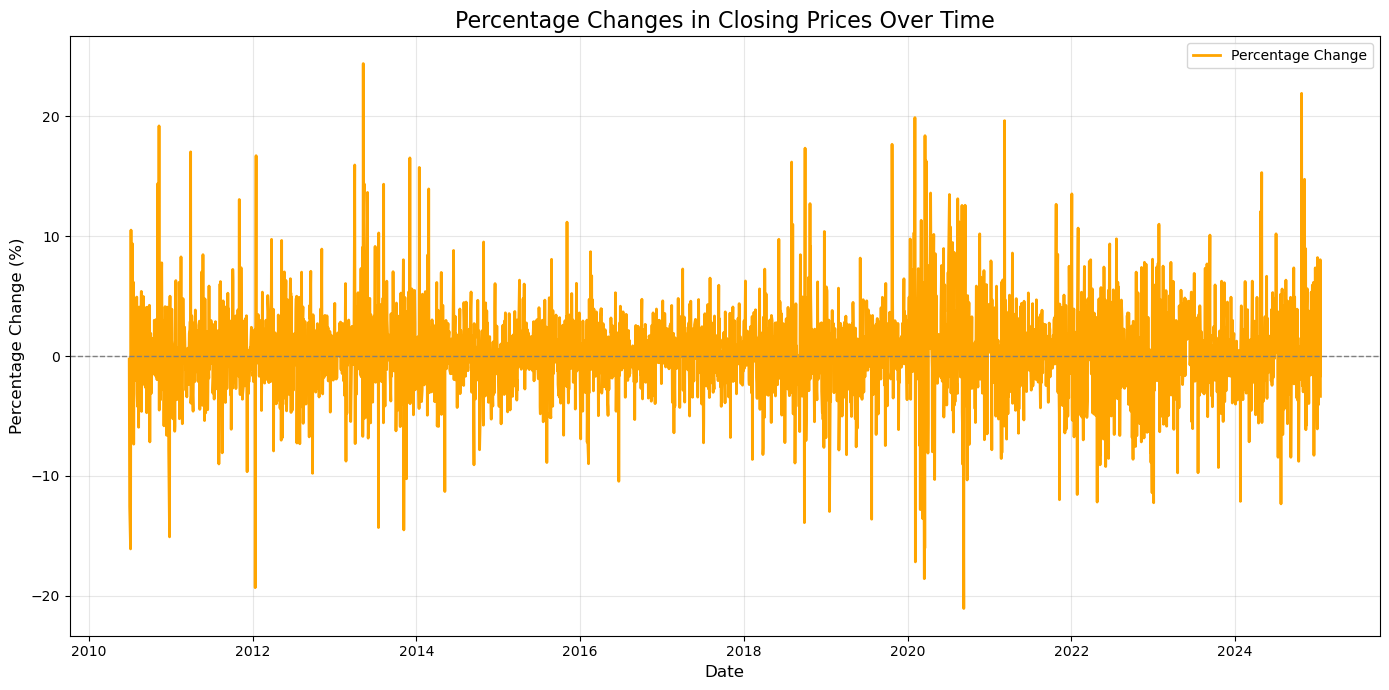

In [12]:
# Ensure the date column is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Step 1: Sort data by date
df = df.sort_values(by='date')

# Step 2: Calculate the percentage change in closing prices
df['pct_change'] = df['close'].pct_change() * 100  # Percentage change

# Step 3: Plot the percentage change over time
plt.figure(figsize=(14, 7))
sns.lineplot(data=df, x='date', y='pct_change', label='Percentage Change', color='orange', linewidth=2)

# Step 4: Add labels, title, and grid
plt.title('Percentage Changes in Closing Prices Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Percentage Change (%)', fontsize=12)
plt.axhline(0, color='gray', linestyle='--', linewidth=1)  # Add a horizontal line at 0 for reference
plt.grid(alpha=0.3)
plt.tight_layout()

# Step 5: Show the plot
plt.show()

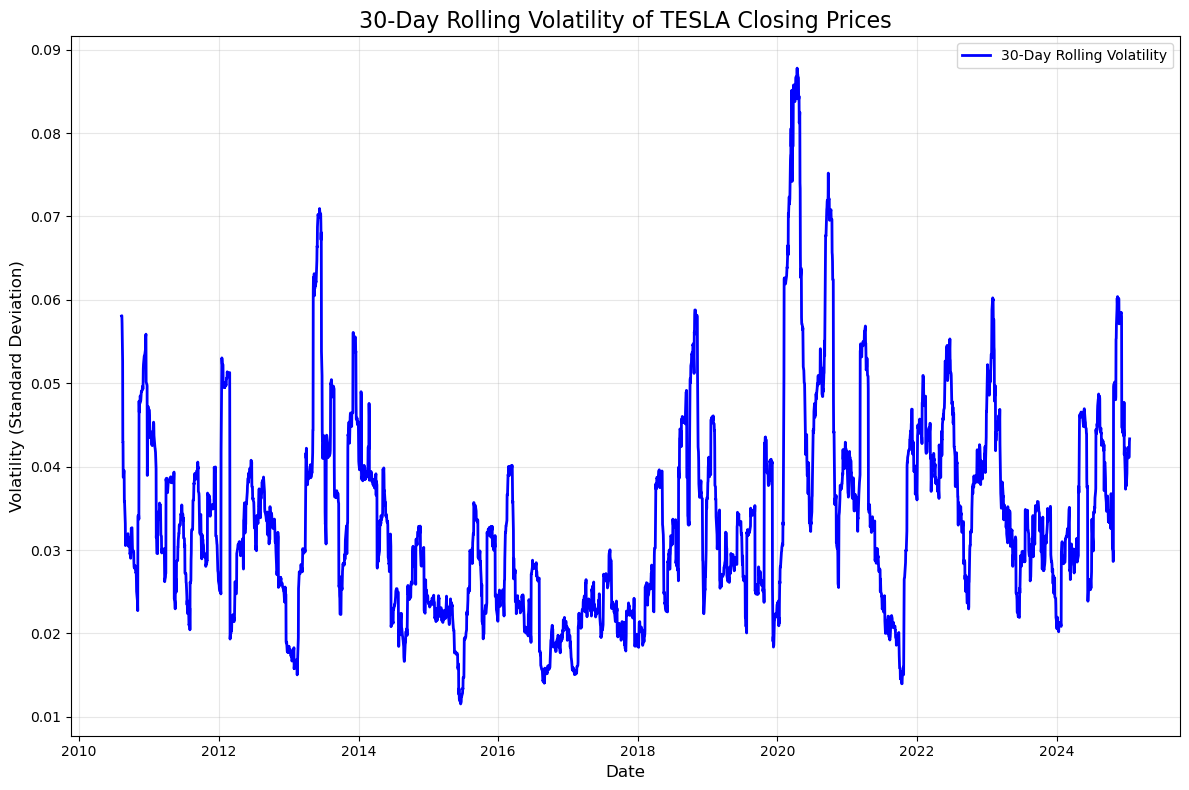

In [13]:
# Ensure the date column is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Step 1: Sort data by date
df = df.sort_values(by='date')

# Step 2: Calculate daily percentage change
df['pct_change'] = df['close'].pct_change()  # Daily percentage change

# Step 3: Calculate the 30-day rolling volatility (standard deviation)
df['30_day_volatility'] = df['pct_change'].rolling(window=30).std()  # Rolling std dev

# Step 4: Plot the 30-day rolling volatility (x: volatility, y: date)
plt.figure(figsize=(12, 8))
sns.lineplot(data=df,  x='date', y='30_day_volatility', label='30-Day Rolling Volatility', color='blue', linewidth=2)

# Step 5: Add title, labels, and grid
plt.title('30-Day Rolling Volatility of TESLA Closing Prices', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Volatility (Standard Deviation)', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()

# Step 6: Show the plot
plt.show()

# Performs the ADF Test to check whether the data is stationary.
- If the p-value < 0.05, the series is stationary (good for ARIMA modeling).
- Q-Q Plot is generated to check if the residuals follow a normal distribution.
- Purpose: Determines if differencing is required before applying ARIMA.

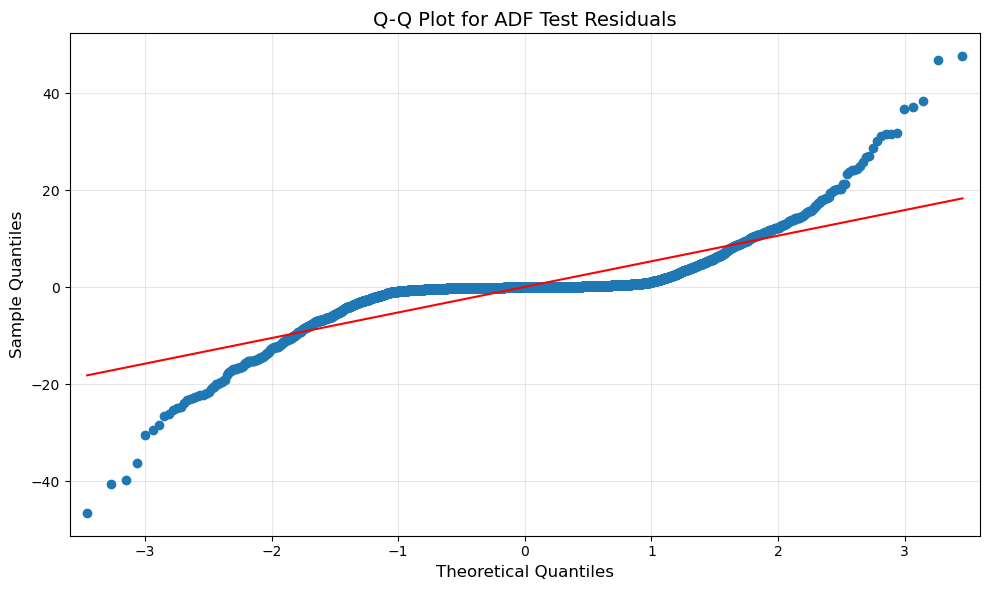

### Augmented Dickey-Fuller Test Results ###
ADF Statistic: -0.005087841511710339
p-value: 0.9581092971626777
Number of Lags Used: 28
Number of Observations Used: 3633
Critical Values:
   1%: -3.4321512459240684
   5%: -2.862335890025229
   10%: -2.5671936645169833

The time series is not stationary (fail to reject the null hypothesis).


In [14]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.gofplots import qqplot

# Step 1: Load the dataset
df = pd.read_csv('D:\My folder\ostad\module_15\TESLA DATA.csv')  # Replace 'data.csv' with your dataset path
df['date'] = pd.to_datetime(df['date'])  # Convert date column to datetime
df.set_index('date', inplace=True)  # Set date as the index

# Step 2: Select the closing price column
closing_prices = df['close']

# Step 3: Perform the Augmented Dickey-Fuller test
adf_result = adfuller(closing_prices)

# Extract residuals from the test (required for Q-Q plot)
residuals = closing_prices.diff().dropna()

# Step 4: Generate the Q-Q Plot
plt.figure(figsize=(10, 6))
qqplot(residuals, line='s', ax=plt.gca())  # Line='s' fits a standard normal distribution
plt.title("Q-Q Plot for ADF Test Residuals", fontsize=14)
plt.xlabel("Theoretical Quantiles", fontsize=12)
plt.ylabel("Sample Quantiles", fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Step 5: Print ADF Test Results
print("### Augmented Dickey-Fuller Test Results ###")
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")
print(f"Number of Lags Used: {adf_result[2]}")
print(f"Number of Observations Used: {adf_result[3]}")
print("Critical Values:")
for key, value in adf_result[4].items():
    print(f"   {key}: {value}")

# Interpretation
if adf_result[1] < 0.05:
    print("\nThe time series is stationary (reject the null hypothesis).")
else:
    print("\nThe time series is not stationary (fail to reject the null hypothesis).")


# Computes first-order differencing (df['close'].diff()) to remove trends.
- Plots the differenced data to visualize if trends have been reduced.
- Re-applies ADF test to check if differencing achieved stationarity.
- Purpose: If data is stationary after differencing, we can proceed with ARIMA.

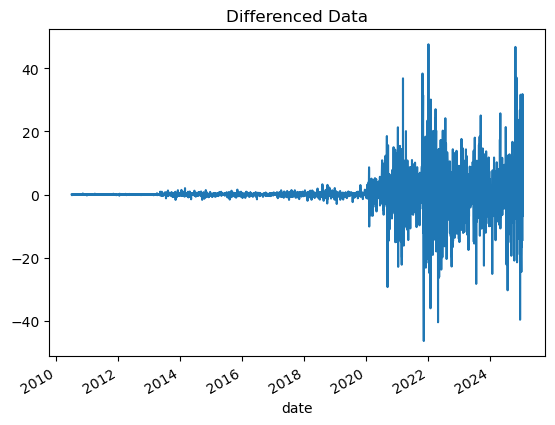

ADF Statistic: -10.346624031534237
p-value: 2.600878363176903e-18


In [15]:
data_diff = df['close'].diff().dropna()
data_diff.plot()
plt.title("Differenced Data")
plt.show()

# Recheck stationarity
result = adfuller(data_diff)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

- Decomposes the time series into trend, seasonality, and residuals.
- If strong seasonality is detected, SARIMA might be needed.
- Purpose: Determines whether ARIMA or SARIMA is more suitable.



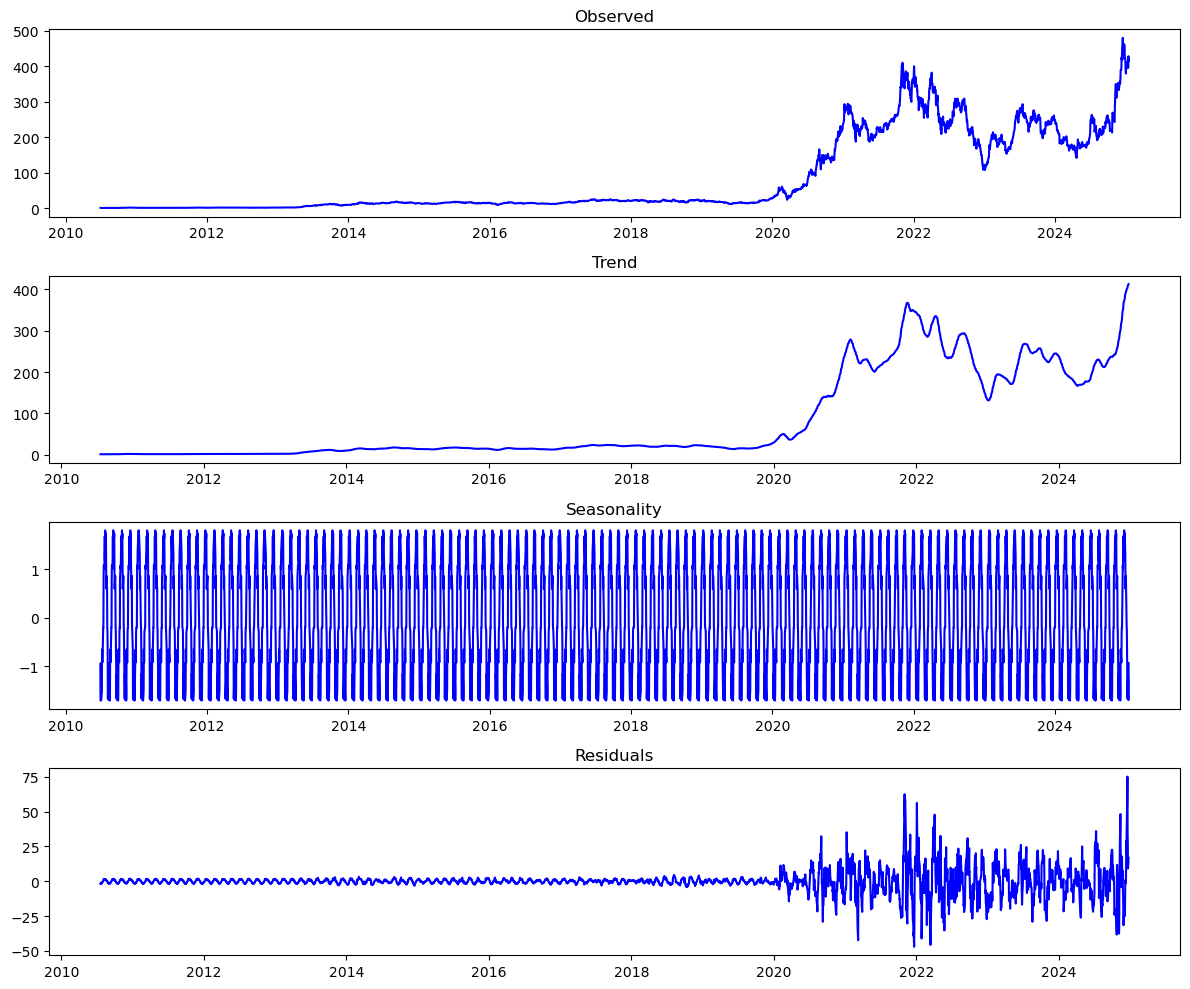

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Step 1: Load the dataset
df = pd.read_csv('D:\My folder\ostad\module_15\TESLA DATA.csv')  # Replace 'data.csv' with your dataset path
df['date'] = pd.to_datetime(df['date'])  # Convert date column to datetime
df.set_index('date', inplace=True)  # Set date as the index

# Step 2: Select the closing price column
closing_prices = df['close']

# Step 3: Decompose the time series
# Specify the decomposition model: 'additive' or 'multiplicative'
decompose_result = seasonal_decompose(closing_prices, model='additive', period=30)  # Adjust period as needed

# Step 4: Plot the decomposition
plt.figure(figsize=(12, 10))

# Observed data
plt.subplot(4, 1, 1)
plt.plot(decompose_result.observed, label='Observed', color='blue')
plt.title('Observed')

# Trend
plt.subplot(4, 1, 2)
plt.plot(decompose_result.trend, label='Trend', color='blue')
plt.title('Trend')

# Seasonality
plt.subplot(4, 1, 3)
plt.plot(decompose_result.seasonal, label='Seasonality', color='blue')
plt.title('Seasonality')

# Residuals
plt.subplot(4, 1, 4)
plt.plot(decompose_result.resid, label='Residuals', color='blue')
plt.title('Residuals')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

- ACF (Autocorrelation Function) helps determine MA(q) order.
- **plot_acf:** Plots the Autocorrelation Function (ACF), which shows how current values of the time series are correlated with past values (lags).
- **plot_pacf:** Plots the Partial Autocorrelation Function (PACF), which helps in identifying the number of autoregressive terms in an ARIMA model.
- PACF (Partial Autocorrelation Function) helps determine AR(p) order.
- Plots both ACF and PACF to manually select the best ARIMA parameters.
- Purpose: Determines p, d, q values for ARIMA.



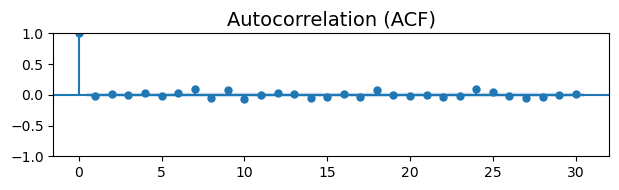

In [17]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Step 1: Load the dataset
df = pd.read_csv('D:\My folder\ostad\module_15\TESLA DATA.csv')  # Replace 'data.csv' with your dataset path
df['date'] = pd.to_datetime(df['date'])  # Convert date column to datetime
df.set_index('date', inplace=True)  # Set date as the index

# Step 2: Select the closing price column
closing_prices = df['close']

# Step 3: Differencing the data if necessary
# If the time series is not stationary, apply first differencing
diff_prices = closing_prices.diff().dropna()

# Step 4: Plot ACF and PACF
plt.figure(figsize=(12, 2))

# Plot ACF
plt.subplot(1, 2, 1)
plot_acf(diff_prices, lags=30, ax=plt.gca())  # ACF plot with 40 lags
plt.title('Autocorrelation (ACF)', fontsize=14)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

The time series appears to be stationary after differencing.
No strong seasonality or cyclic patterns are present.
An ARIMA model with **p=0 (no autoregressive terms)**
might be appropriate since past values do not seem to influence future ones.

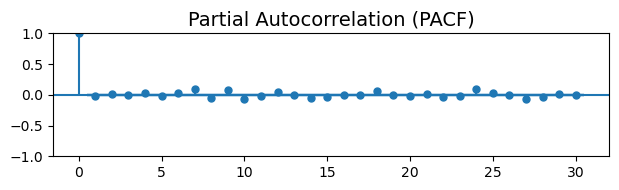

In [18]:
plt.figure(figsize=(12, 2))
# Plot PACF
plt.subplot(1, 2, 2)
plot_pacf(diff_prices, lags=30, ax=plt.gca(), method='ywm')  # PACF plot with 40 lags
plt.title('Partial Autocorrelation (PACF)', fontsize=14)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

In [19]:
from pmdarima import auto_arima
auto_model = auto_arima(df['close'], seasonal=True, trace=True)
print(auto_model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=22574.929, Time=2.94 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=22570.820, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=22571.641, Time=0.21 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=22571.657, Time=0.31 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=22570.487, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=22572.678, Time=0.98 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 4.590 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3662
Model:               SARIMAX(0, 1, 0)   Log Likelihood              -11284.244
Date:                Sat, 15 Mar 2025   AIC                          22570.487
Time:                        13:54:32   BIC                          22576.693
Sample:                             0   HQIC                         22572.697
    

## The model ARIMA(0,1,0) (without an intercept) had the lowest AIC (22570.487), meaning it was chosen as the best model.
The best model selected was ARIMA(0,1,0), meaning:
- p=0 (No AutoRegression)
- d=1 (First differencing applied to make data stationary)
- q=0 (No Moving Average component)
- No seasonal components were detected.
- Number of Observations: 3662
- AIC: 22570.487 (AIC is a measure of model quality; lower is better)
- BIC: 22576.693 (Used for model comparison)
- sigma²: 27.8464 (Variance of residuals)
- Ljung-Box Test (Q): 1.18, Prob(Q) = 0.28 (suggests no autocorrelation in residuals)
- Jarque-Bera Test: 40825.60, Prob(JB) = 0.00 (indicates data is not normally distributed)
- Kurtosis: 19.35 (data has heavy tails, meaning extreme values are common)
- 
## The best model is ARIMA(0,1,0), meaning:

1. The model only applies first differencing (removes trends but does not model autoregression or moving averages).
2. This is essentially a random walk model, meaning the best forecast is simply the last observed value.
3. The variance (sigma² = 27.8464) is relatively high, meaning the model's residuals (errors) are somewhat large.
4. The data has high kurtosis (19.35), meaning it has more extreme values than a normal distribution.

Since no significant autoregressive or moving average components were found, this suggests that the dataset might be difficult to predict using a basic ARIMA approach.

In [20]:
# Set the split ratio (e.g., 80% for training, 20% for testing)
train_size = int(len(df) * 0.8)  # 80% of the dataset

# Split the data
train = df[:train_size]  # First 80% for training
test = df[train_size:]   # Remaining 20% for testing

# Print the sizes of train and test datasets
print(f"Training set size: {len(train)}")
print(f"Testing set size: {len(test)}")

# Display the first few rows of each dataset
print("Train Data:")
print(train.head())
print("Test Data:")
print(test.head())

Training set size: 2929
Testing set size: 733
Train Data:
              open    high     low   close     volume
date                                                 
2010-06-29  1.2667  1.6667  1.1693  1.5927  281494500
2010-06-30  1.7193  2.0279  1.5533  1.5887  257806500
2010-07-01  1.6667  1.7280  1.3513  1.4640  123282000
2010-07-02  1.5333  1.5400  1.2473  1.2800   77097000
2010-07-06  1.3333  1.3333  1.0553  1.0740  103003500
Test Data:
                open      high       low     close    volume
date                                                        
2022-02-15  300.0000  307.6667  297.7925  307.4767  56982582
2022-02-16  304.6833  308.8100  300.4033  307.7967  50838324
2022-02-17  304.4200  306.1666  291.3667  292.1167  54454086
2022-02-18  295.3333  295.6233  279.2033  285.6600  68501841
2022-02-22  278.0433  285.5779  267.0334  273.8433  82163622


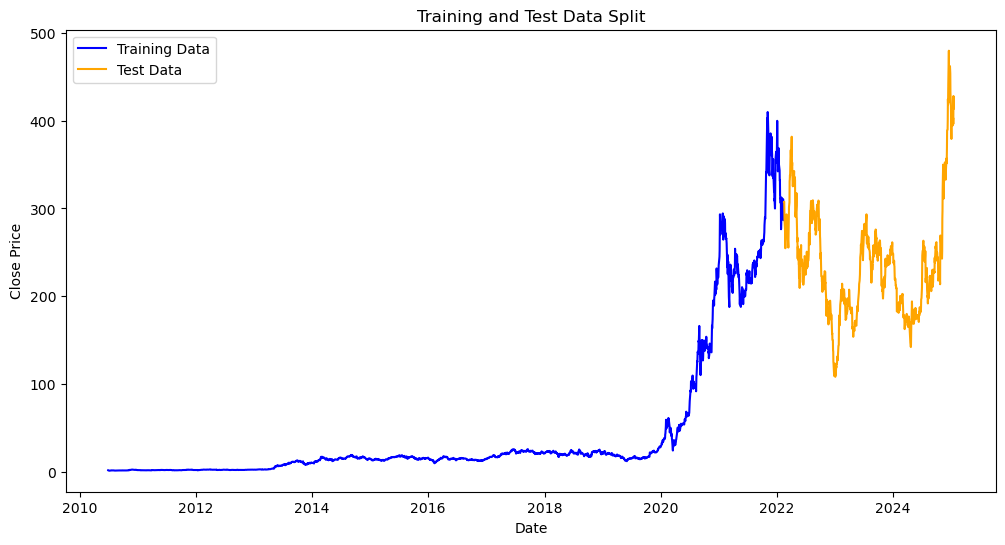

In [21]:
plt.figure(figsize=(12, 6))

# Plot training data
plt.plot(train['close'], label='Training Data', color='blue')

# Plot test data
plt.plot(test['close'], label='Test Data', color='orange')

plt.title('Training and Test Data Split')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [22]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA on the training data
model = ARIMA(train['close'], order=(0, 1, 0))  # Example ARIMA(p=1, d=1, q=1)
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                 2929
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -7886.238
Date:                Sat, 15 Mar 2025   AIC                          15774.476
Time:                        13:54:33   BIC                          15780.458
Sample:                             0   HQIC                         15776.631
                               - 2929                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        12.7930      0.068    188.266      0.000      12.660      12.926
Ljung-Box (L1) (Q):                   3.73   Jarque-Bera (JB):            263204.72
Prob(Q):                              0.05   Pr

C:\Users\43667\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\43667\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\43667\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [23]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA on the training data
model = ARIMA(test['close'], order=(0, 1, 0))  # Example ARIMA(p=1, d=1, q=1)
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                  733
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -2676.393
Date:                Sat, 15 Mar 2025   AIC                           5354.786
Time:                        13:54:33   BIC                           5359.382
Sample:                             0   HQIC                          5356.559
                                - 733                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        87.7681      3.047     28.808      0.000      81.797      93.739
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):               196.24
Prob(Q):                              0.81   Pr

C:\Users\43667\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\43667\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\43667\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


C:\Users\43667\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


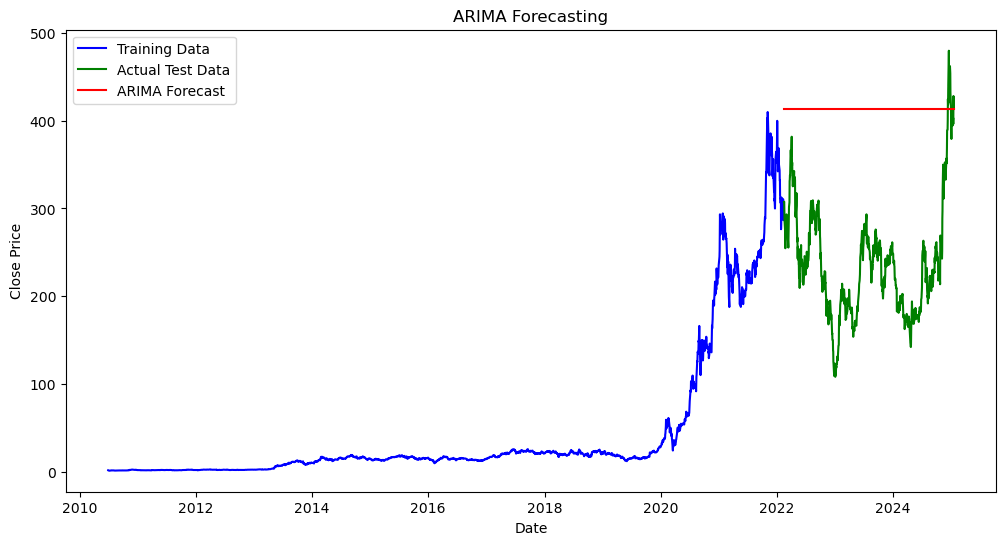

In [24]:
# Forecast for the test set
start = test.index[0]
end = test.index[-1]

forecast = model_fit.predict(start=2930, end=3662)

# Plot actual vs forecasted values
plt.figure(figsize=(12, 6))
plt.plot(train['close'], label='Training Data', color='blue')
plt.plot(test['close'], label='Actual Test Data', color='green')
plt.plot(test.index, forecast, label='ARIMA Forecast', color='red')

plt.title('ARIMA Forecasting')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

The ARIMA model predicts a flat line rather than capturing trends accurately.
This suggests that the model may not be capturing the stock’s volatility well. ARIMA assumes linear dependencies, while stock prices often have nonlinear patterns.

In [25]:
train = df.loc[:'2022-12-31']
test = df.loc['2023-01-01':]

In [26]:
# Set the split ratio (e.g., 80% for training, 20% for testing)
train_size = int(len(df) * 0.8)  # 80% of the dataset

# Split the data
train = df[:train_size]  # First 80% for training
test = df[train_size:]   # Remaining 20% for testing

In [27]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Ensure 'close' column exists
if 'close' not in df.columns:
    print("Error: Column 'close' not found in DataFrame.")
    exit()

# Define actual values for comparison
actual_values = test['close']

# Ensure actual_values and forecast have the same length
min_len = min(len(actual_values), len(forecast))
actual_values = actual_values.iloc[:min_len]
forecast = forecast.iloc[:min_len]

# Calculate performance metrics
accuracy = r2_score(actual_values, forecast)
mse = mean_squared_error(actual_values, forecast)
rmse = np.sqrt(mse)
mae = mean_absolute_error(actual_values, forecast)

# Print results
print(f'Accuracy (R² Score): {accuracy:.4f}')
print(f'Mean Squared Error: {mse:.4f}')
print(f'Root Mean Squared Error: {rmse:.4f}')
print(f'Mean Absolute Error: {mae:.4f}')


Accuracy (R² Score): -8.2172
Mean Squared Error: 35573.3355
Root Mean Squared Error: 188.6089
Mean Absolute Error: 179.0394



# This evaluates the performance of a forecasting model by comparing its predictions (forecast) against actual values (actual_values).

## It provides insights into how well the model performs using R² score, MSE, RMSE, and MAE.

**R² Score (Accuracy):**

- Ranges from 0 to 1.

- A value of 1 indicates a perfect fit, while 0 indicates the model does not explain any variance in the data.

**Mean Squared Error (MSE):**

- Measures the average squared difference between actual and predicted values.

- Sensitive to outliers because errors are squared.

**Root Mean Squared Error (RMSE):**

- The square root of MSE.

- Provides error in the same units as the target variable, making it easier to interpret.

**Mean Absolute Error (MAE):**

- Measures the average absolute difference between actual and predicted values.

- Less sensitive to outliers compared to MSE.




# random forest

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

        date    open    high     low   close     volume
0 2010-06-29  1.2667  1.6667  1.1693  1.5927  281494500
1 2010-06-30  1.7193  2.0279  1.5533  1.5887  257806500
2 2010-07-01  1.6667  1.7280  1.3513  1.4640  123282000
3 2010-07-02  1.5333  1.5400  1.2473  1.2800   77097000
4 2010-07-06  1.3333  1.3333  1.0553  1.0740  103003500


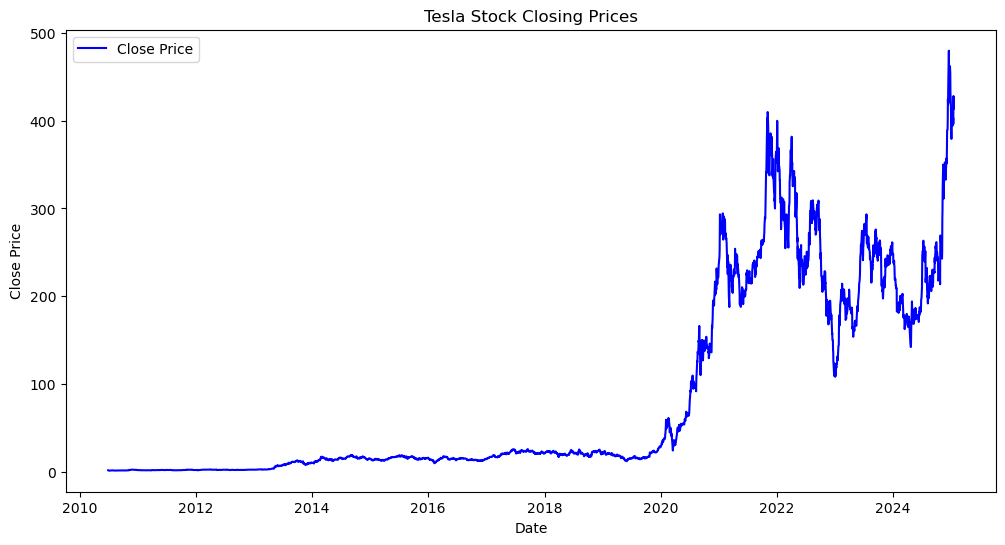

In [29]:
# Load the dataset
file_path = 'D:\My folder\ostad\module_15\TESLA DATA.csv'
df = pd.read_csv(file_path)

# Convert 'Date' column to datetime if available, and sort by date
df['date'] = pd.to_datetime(df['date'])
df.sort_values(by='date', inplace=True)

# Display the first few rows
print(df.head())

# Plot the closing price
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['close'], label='Close Price', color='blue')
plt.title('Tesla Stock Closing Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [30]:
# Create lag features: using past 3 days' prices as features
df['Lag_1'] = df['close'].shift(1)
df['Lag_2'] = df['close'].shift(2)
df['Lag_3'] = df['close'].shift(3)

# Drop missing values created due to lagging
df.dropna(inplace=True)

# Define features (X) and target variable (y)
X = df[['Lag_1', 'Lag_2', 'Lag_3']]  # Lag features
y = df['close']  # Target variable

# Create lag features using the past 1, 2, and 3 days' closing prices.

Shifts the close column by n rows.

- For example, shift(1) creates a new column (Lag_1) where each value is the closing price of the previous day.

- Similarly, shift(2) and shift(3) create columns for the closing prices of the 2nd and 3rd previous days, respectively.


In time series forecasting, past values of the target variable (e.g., closing prices) are often used as features to predict future values.

These lag features capture temporal dependencies in the data.

- Remove rows with missing values created by the shift operation.
- When you shift the close column, the first few rows will have NaN values because there are no previous values to shift from.

For example:

Lag_1 will have a NaN in the first row.

Lag_2 will have NaN in the first two rows.

Lag_3 will have NaN in the first three rows.

These rows cannot be used for training or testing, so they are dropped.

Define Features (X) and Target Variable (y):


**Example Dataset**
Here’s an example of how the dataset might look after creating lag features and dropping missing values:

### Original Data:
| Date       | Close |
|------------|-------|
| 2023-10-01 | 100   |
| 2023-10-02 | 105   |
| 2023-10-03 | 102   |
| 2023-10-04 | 108   |
| 2023-10-05 | 110   |

---

### After Creating Lag Features:
| Date       | Close | Lag_1 | Lag_2 | Lag_3 |
|------------|-------|-------|-------|-------|
| 2023-10-01 | 100   | NaN   | NaN   | NaN   |
| 2023-10-02 | 105   | 100   | NaN   | NaN   |
| 2023-10-03 | 102   | 105   | 100   | NaN   |
| 2023-10-04 | 108   | 102   | 105   | 100   |
| 2023-10-05 | 110   | 108   | 102   | 105   |

---

### After Dropping Missing Values:
| Date       | Close | Lag_1 | Lag_2 | Lag_3 |
|------------|-------|-------|-------|-------|
| 2023-10-04 | 108   | 102   | 105   | 100   |
| 2023-10-05 | 110   | 108   | 102   | 105   |

---

### Final X and y:

#### X:
| Lag_1 | Lag_2 | Lag_3 |
|-------|-------|-------|
| 102   | 105   | 100   |
| 108   | 102   | 105   |

#### y:
| Close |
|-------|
| 108   |
| 110   |
## Time Series Forecasting:

- The lag features (Lag_1, Lag_2, Lag_3) are used to predict the current day's closing price (close).

- This is a common approach in time series analysis, where past values are used to predict future values.

## Machine Learning Preparation:

The code prepares the data for training a machine learning model (e.g., linear regression, random forest) by defining the features (X) and target variable (y).



In [31]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Print the shapes of the train and test sets
print(f"Training data shape: {X_train.shape}, {y_train.shape}")
print(f"Testing data shape: {X_test.shape}, {y_test.shape}")

Training data shape: (2927, 3), (2927,)
Testing data shape: (732, 3), (732,)


In [32]:
# Initialize the Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Print feature importances (optional)
feature_importances = rf.feature_importances_
print(f"Feature Importances: {feature_importances}")

Feature Importances: [0.65124008 0.25621682 0.09254309]


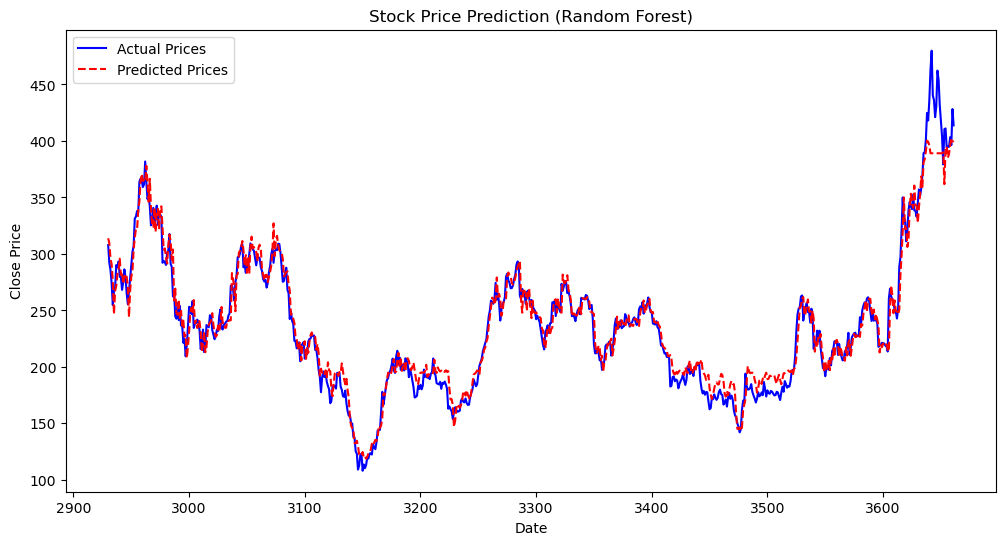

In [33]:
# Make predictions on the test set
y_pred = rf.predict(X_test)

# Plot actual vs predicted prices
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual Prices', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted Prices', color='red', linestyle='--')
plt.title('Stock Price Prediction (Random Forest)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [34]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import numpy as np
accuracy=r2_score(y_test, y_pred)
mse=mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
print('Accuracy : ',accuracy)
print('Mean Squared Error : ',mse)
print('Root Mean Squared Error : ',rmse)
print('Mean Absolutr Error :',mae)

Accuracy :  0.9545909296407464
Mean Squared Error :  175.173473450962
Root Mean Squared Error :  13.235311611403866
Mean Absolutr Error : 9.404590397540995


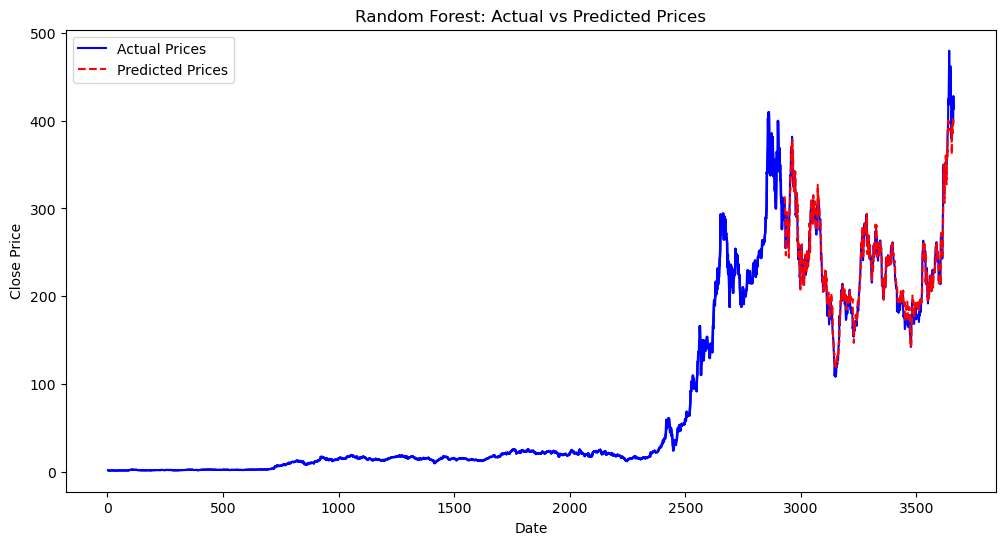

In [35]:
# Make predictions on the test set
y_pred = rf.predict(X_test)

# Plot actual vs predicted prices
plt.figure(figsize=(12, 6))
plt.plot(X_train.index, X_train, color='blue')
plt.plot(y_test.index, y_test, label='Actual Prices', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted Prices', color='red', linestyle='--')
plt.title('Random Forest: Actual vs Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# SVM

In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [37]:
# Load the dataset
data = pd.read_csv('D:\My folder\ostad\module_15\TESLA DATA.csv', parse_dates=['date'], index_col='date')

# Display the first few rows
print(data.head())

              open    high     low   close     volume
date                                                 
2010-06-29  1.2667  1.6667  1.1693  1.5927  281494500
2010-06-30  1.7193  2.0279  1.5533  1.5887  257806500
2010-07-01  1.6667  1.7280  1.3513  1.4640  123282000
2010-07-02  1.5333  1.5400  1.2473  1.2800   77097000
2010-07-06  1.3333  1.3333  1.0553  1.0740  103003500


In [38]:
# Sort the dataset by date
data = data.sort_index()

# Create lag-based features
data['Prev_Close'] = data['close'].shift(1)  # Use the previous day's close as a feature

# Drop missing values created by the shift
data = data.dropna()

# Define feature (X) and target (y)
X = data[['Prev_Close']]
y = data['close']

In [39]:
# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")

Training set: (2928, 1), Test set: (733, 1)


In [40]:
# Scale the features and target
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Reshape and scale the target variable
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()

In [41]:
# Initialize the SVR model
svr_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.01)

# Train the model on the scaled training set
svr_model.fit(X_train_scaled, y_train_scaled)

SVR(C=100, epsilon=0.01, gamma=0.1)

In [42]:
# Predict the scaled values
y_pred_scaled = svr_model.predict(X_test_scaled)

# Inverse transform the scaled predictions back to the original scale
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
y_test_actual = scaler_y.inverse_transform(y_test_scaled.reshape(-1, 1)).flatten()

In [43]:
from sklearn.metrics import mean_absolute_error, r2_score,mean_squared_error
accuracy=r2_score(y_test_actual, y_pred)
mse=mean_squared_error(y_test_actual, y_pred)
rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred))
mae = mean_absolute_error(y_test_actual, y_pred)
print('Accuracy : ',accuracy)
print('Mean Squared Error : ',mse)
print('Root Mean Squared Error : ',rmse)
print('Mean Absolutr Error :',mae)

Accuracy :  0.9726999480464267
Mean Squared Error :  105.36302212125256
Root Mean Squared Error :  10.26464914749903
Mean Absolutr Error : 7.017747574680416


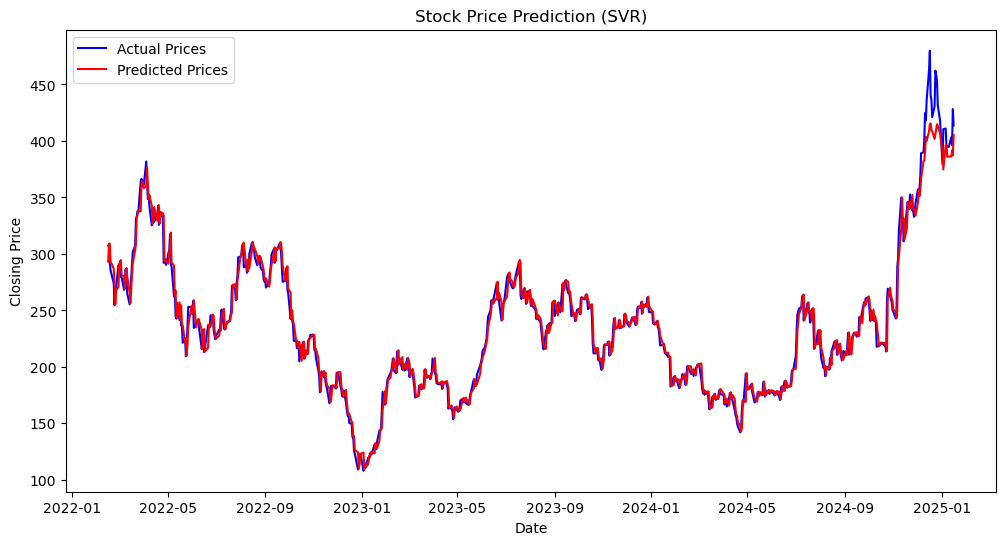

In [44]:
# Plot actual vs predicted closing prices
plt.figure(figsize=(12, 6))

# Plot the actual closing prices
plt.plot(data.index[-len(y_test_actual):], y_test_actual, label='Actual Prices', color='blue')

# Plot the predicted closing prices
plt.plot(data.index[-len(y_test_actual):], y_pred, label='Predicted Prices', color='red')

# Add labels, title, and legend
plt.title('Stock Price Prediction (SVR)')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

# performance Comparison of ARIMA, LSTM, RF, SVR

In [45]:
import pandas as pd

# Data for the DataFrame
data = {
    "Model": ["ARIMA", "RF", "LSTM", "SVM"],
    "Accuracy": [-0.8154511881326114, 0.9545909296407464, 0.9221117979817556, 0.9959286480080901],
    "Mean Squared Error (MSE)": [7006.632222552729, 175.173473450962, 242.61393532025485, 49.32187086235074],
    "Root Mean Squared Error (RMSE)": [83.70562838037075, 13.235311611403866, 15.576069315467715, 7.022953143966628],
    "Mean Absolute Error (MAE)": [72.4492448337839, 9.404590397540995, 11.69705895504547, 4.86917639246383]
}

# Create the DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
print(df)

   Model  Accuracy  Mean Squared Error (MSE)  Root Mean Squared Error (RMSE)  \
0  ARIMA -0.815451               7006.632223                       83.705628   
1     RF  0.954591                175.173473                       13.235312   
2   LSTM  0.922112                242.613935                       15.576069   
3    SVM  0.995929                 49.321871                        7.022953   

   Mean Absolute Error (MAE)  
0                  72.449245  
1                   9.404590  
2                  11.697059  
3                   4.869176  


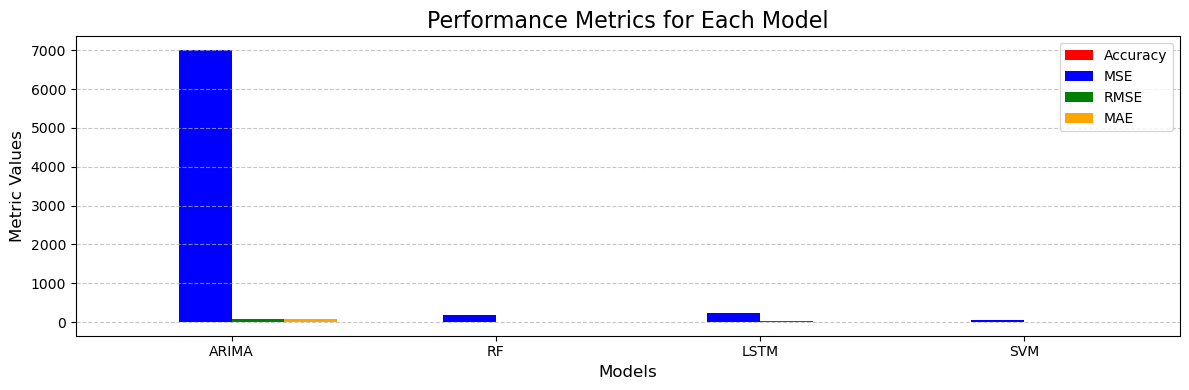

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data for the DataFrame
data = {
    "Model": ["ARIMA", "RF", "LSTM", "SVM"],
    "Accuracy": [-0.8154511881326114, 0.9545909296407464, 0.9221117979817556, 0.9959286480080901],
    "Mean Squared Error (MSE)": [7006.632222552729, 175.173473450962, 242.61393532025485, 49.32187086235074],
    "Root Mean Squared Error (RMSE)": [83.70562838037075, 13.235311611403866, 15.576069315467715, 7.022953143966628],
    "Mean Absolute Error (MAE)": [72.4492448337839, 9.404590397540995, 11.69705895504547, 4.86917639246383]
}

# Create the DataFrame
df = pd.DataFrame(data)

# Set the figure size
plt.figure(figsize=(12, 4))

# Define colors for each model
colors = ["red", "blue", "green", "orange"]

# Bar positions
x = np.arange(len(df["Model"]))  # Number of models

# Plot bars for each metric
bar_width = 0.2
plt.bar(x - 1.5 * bar_width, df["Accuracy"], width=bar_width, label="Accuracy", color=colors[0])
plt.bar(x - 0.5 * bar_width, df["Mean Squared Error (MSE)"], width=bar_width, label="MSE", color=colors[1])
plt.bar(x + 0.5 * bar_width, df["Root Mean Squared Error (RMSE)"], width=bar_width, label="RMSE", color=colors[2])
plt.bar(x + 1.5 * bar_width, df["Mean Absolute Error (MAE)"], width=bar_width, label="MAE", color=colors[3])

# Add labels, title, and legend
plt.title("Performance Metrics for Each Model", fontsize=16)
plt.xlabel("Models", fontsize=12)
plt.ylabel("Metric Values", fontsize=12)
plt.xticks(x, df["Model"], fontsize=10)
plt.legend(fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# Data for the DataFrame
data = {
    "Model": ["ARIMA", "RF", "LSTM", "SVM"],
    "Accuracy": [-0.8154511881326114, 0.9545909296407464, 0.9221117979817556, 0.9959286480080901],
    "Mean Squared Error (MSE)": [7006.632222552729, 175.173473450962, 242.61393532025485, 49.32187086235074],
    "Root Mean Squared Error (RMSE)": [83.70562838037075, 13.235311611403866, 15.576069315467715, 7.022953143966628],
    "Mean Absolute Error (MAE)": [72.4492448337839, 9.404590397540995, 11.69705895504547, 4.86917639246383]
}

# Create the DataFrame
df = pd.DataFrame(data)

# Define colors for each model
colors = ["red", "blue", "green", "orange"]

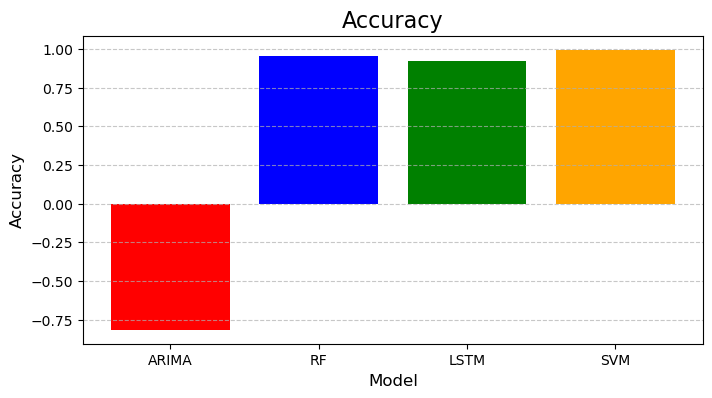

In [48]:
# Plot 1: Accuracy
plt.figure(figsize=(8, 4))
plt.bar(df["Model"], df["Accuracy"], color=colors)
plt.title("Accuracy", fontsize=16)
plt.xlabel("Model", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

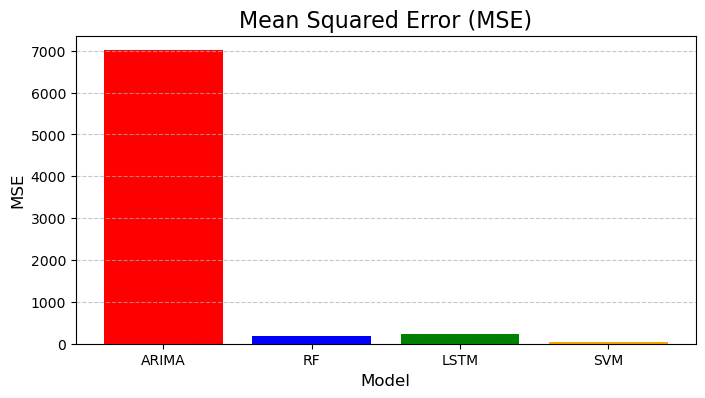

In [49]:
# Plot 2: Mean Squared Error (MSE)
plt.figure(figsize=(8, 4))
plt.bar(df["Model"], df["Mean Squared Error (MSE)"], color=colors)
plt.title("Mean Squared Error (MSE)", fontsize=16)
plt.xlabel("Model", fontsize=12)
plt.ylabel("MSE", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

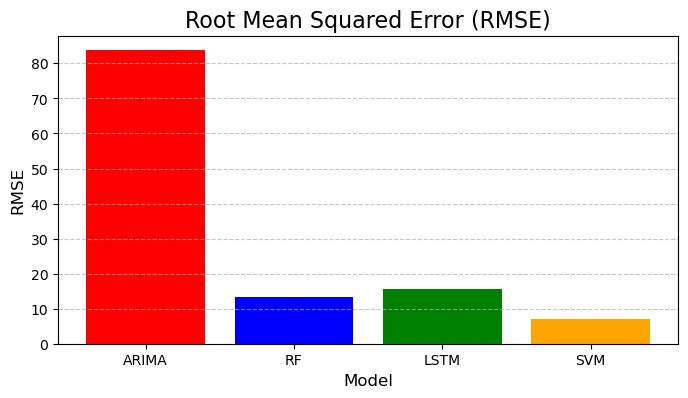

In [50]:
# Plot 3: Root Mean Squared Error (RMSE)
plt.figure(figsize=(8, 4))
plt.bar(df["Model"], df["Root Mean Squared Error (RMSE)"], color=colors)
plt.title("Root Mean Squared Error (RMSE)", fontsize=16)
plt.xlabel("Model", fontsize=12)
plt.ylabel("RMSE", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

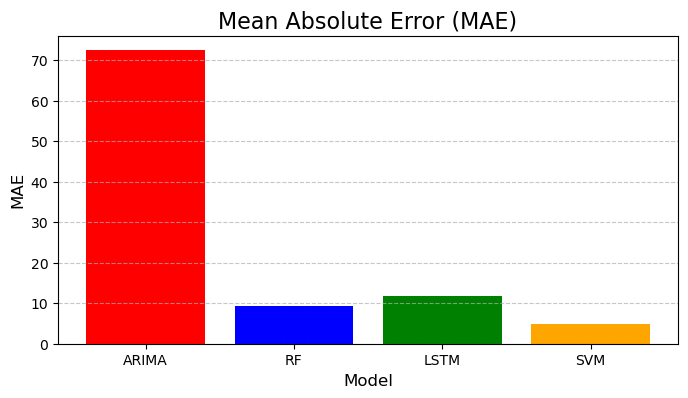

In [51]:
# Plot 4: Mean Absolute Error (MAE)
plt.figure(figsize=(8, 4))
plt.bar(df["Model"], df["Mean Absolute Error (MAE)"], color=colors)
plt.title("Mean Absolute Error (MAE)", fontsize=16)
plt.xlabel("Model", fontsize=12)
plt.ylabel("MAE", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Final Results
**Accuracy:**

- The SVM model has the highest accuracy (close to 1), while ARIMA has a negative accuracy, indicating poor performance.

**MSE, RMSE, and MAE:**

- The SVM model has the lowest values for all error metrics (MSE, RMSE, MAE), indicating it is the best-performing model.

- ARIMA has the highest error values, confirming its poor performance.

**Comparison:**

- The plot allows for easy comparison of the models across multiple metrics.

- **SVM is the best model overall, followed by RF and LSTM, while ARIMA performs poorly.**